In [1]:
import os
import torch
import matplotlib.pyplot as plt

from collections import deque
from function.model.cnn_w import Model
from function.Dataset_w import CustomDataset
from function.function_w import get_device, get_path, GradCAM

In [2]:
DEVICE = get_device()
ROOT_PATH = os.getcwd()
PATH_DICT = get_path(ROOT_PATH)

model = Model().to(DEVICE)
model.load_state_dict(torch.load(PATH_DICT['save_path'] + '\\cnn_w_ver1.pt'))

Using PyTorch version: 2.6.0+cu124
Current device: cuda


<All keys matched successfully>

In [3]:
dataset = CustomDataset(path_dict=PATH_DICT, run_type='val')

Summary of the validation dataset
(insect)	Camouflage       	images:	10
(insect)	Aposematism      	images:	10



In [4]:
model.eval()
class_activiation_map = {
    0: deque([]),
    1: deque([])
}

for ins, env1, env2, env3, env4, label in dataset:
    ins = ins.unsqueeze(0).to(DEVICE)
    env_images = [env.unsqueeze(0).to(DEVICE) for env in [env1, env2, env3, env4]]
    grad_cam = GradCAM(model, model.features_ins[4])
    cam = grad_cam(ins, env_images, label)
    class_activiation_map[label].append((
        ins.squeeze().permute(1, 2, 0).cpu().numpy(),
        cam.squeeze().cpu().numpy()
    ))
    grad_cam.remove_hooks()

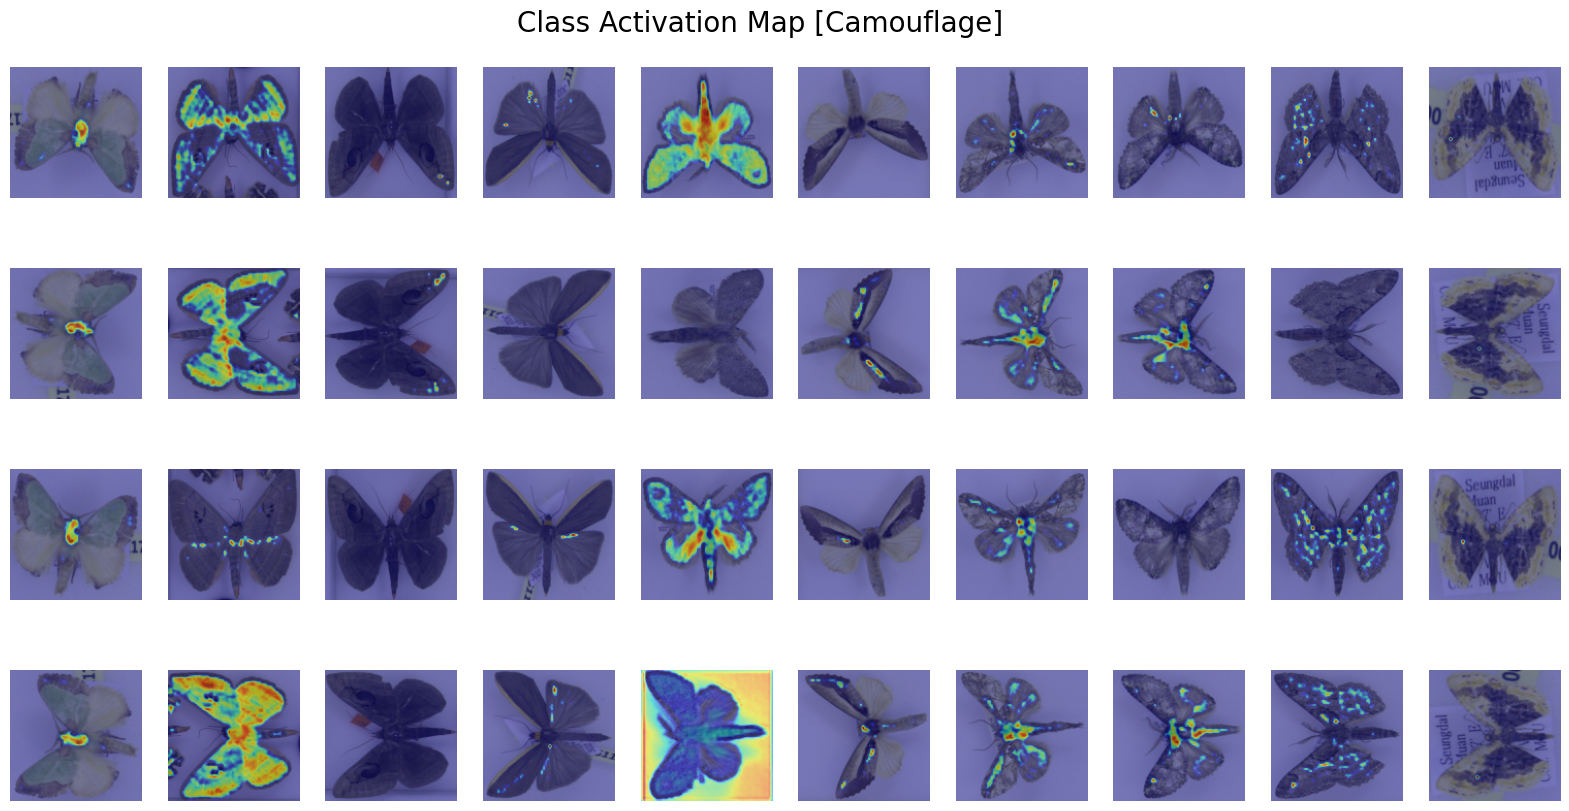

In [5]:
fig, axs = plt.subplots(4, 10, figsize=(20, 10))
fig.suptitle("Class Activation Map [Camouflage]", fontsize=20, y=0.92)

for i in range(10):
    for j, ax in enumerate(axs[:, i]):
        ins, cam = class_activiation_map[0][4*i + j]
        ax.imshow(ins)
        ax.imshow(cam, cmap='jet', alpha=0.5)
        ax.axis('off')

plt.show()

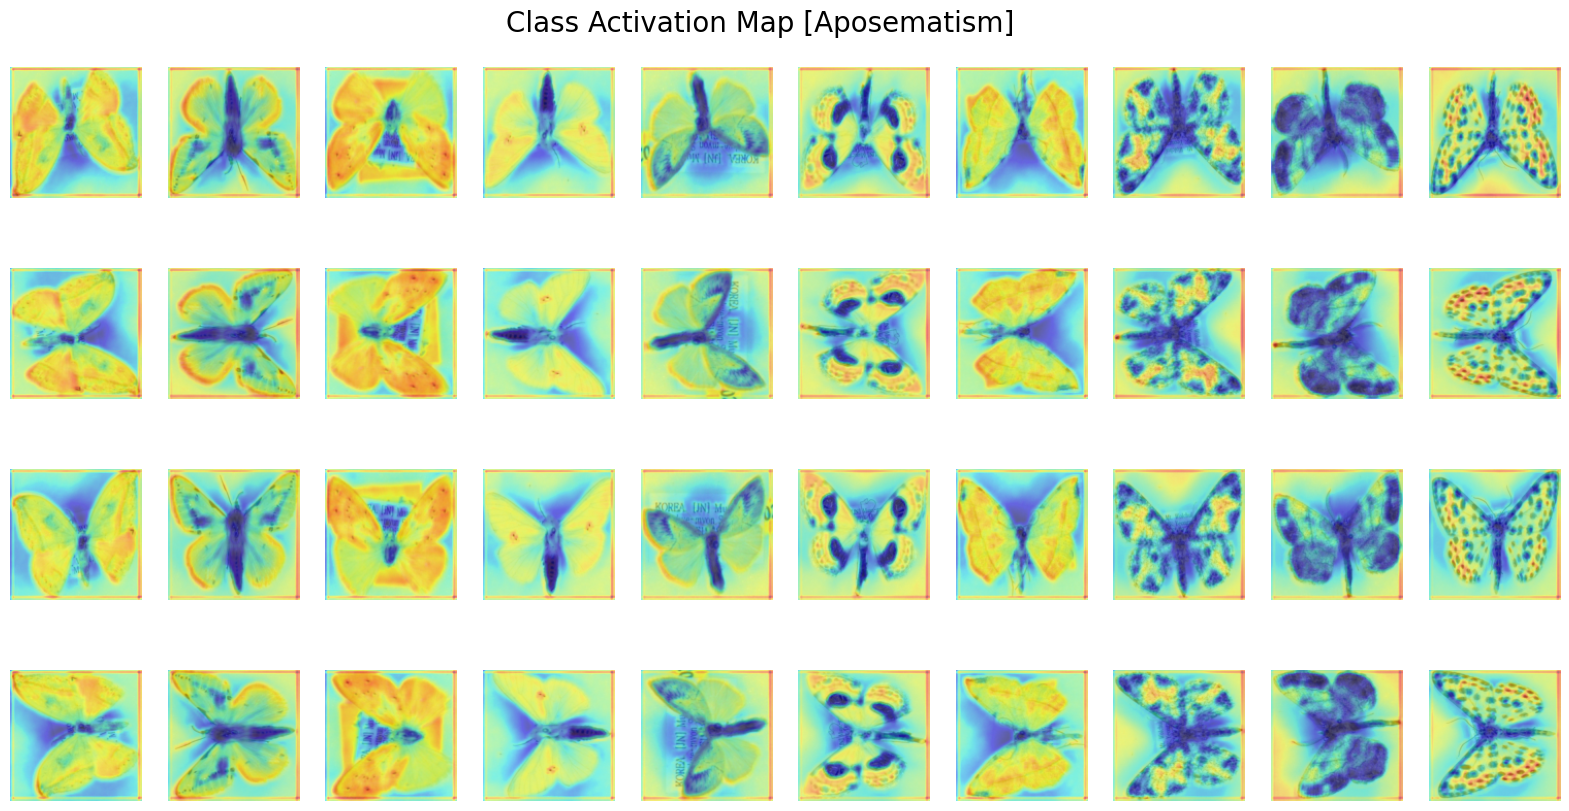

In [6]:
fig, axs = plt.subplots(4, 10, figsize=(20, 10))
fig.suptitle("Class Activation Map [Aposematism]", fontsize=20, y=0.92)

for i in range(10):
    for j, ax in enumerate(axs[:, i]):
        ins, cam = class_activiation_map[1][4*i + j]
        ax.imshow(ins)
        ax.imshow(cam, cmap='jet', alpha=0.5)
        ax.axis('off')

plt.show()